In [ ]:
#pip install obsei dateparser

In [ ]:
# code credit - Lalit Pagaria - https://github.com/obsei/obsei/blob/master/example/youtube_scrapper_example.py

# import logging
# import sys

![](https://raw.githubusercontent.com/obsei/obsei-resources/master/images/Obsei_diagram.png)

In [ ]:
from obsei.source import YoutubeScrapperSource, YoutubeScrapperConfig


from obsei.analyzer.classification_analyzer import (
    ClassificationAnalyzerConfig,
    ZeroShotClassificationAnalyzer,
)


In [ ]:

# logger = logging.getLogger(__name__)
# logging.basicConfig(stream=sys.stdout, level=logging.INFO)


In [ ]:
video_url = 'https://www.youtube.com/watch?v=5zOHSysMmH0'

In [ ]:
source_config = YoutubeScrapperConfig(
    video_url= video_url,
    fetch_replies=False,
    max_comments=20,
    lookup_period="1Y",
)


In [ ]:
source = YoutubeScrapperSource()

source_response_list = source.lookup(source_config)

In [24]:

for idx, source_response in enumerate(source_response_list):
    print(f"source_response#'{idx}'='{source_response.__dict__}'")


source_response#'0'='{'segmented_data': {}, 'meta': {'comment_id': 'UgwMriIvz7jk8BZBh7t4AaABAg', 'text': 'Here are the timestamps. Please check out our sponsors below to support this podcast.\n0:00 - Introduction & sponsor mentions:\n5:36 - Metaverse\n25:36 - Identity in Metaverse\n37:45 - Security\n42:10 - Social Dilemma\n1:04:16 - Instagram whistleblower\n1:09:01 - Social media and mental health\n1:14:26 - Censorship\n1:31:35 - Translation\n1:39:10 - Advice for young people\n1:44:58 - Daughters\n1:47:46 - Mortality\n1:52:19 - Question for God\n1:55:25 - Meaning of life\n\nSponsors:\n- Paperspace: https://gradient.run/lex to get $15 credit\n- Coinbase: https://coinbase.com/lex to get $5 in free Bitcoin\n- InsideTracker: https://insidetracker.com/lex and use code Lex25 to get 25% off\n- ExpressVPN: https://expressvpn.com/lexpod and use code LexPod to get 3 months free\n- Blinkist: https://blinkist.com/lex and use code LEX to get 25% off premium', 'time': datetime.datetime(2022, 2, 26, 

In [ ]:

text_analyzer = ZeroShotClassificationAnalyzer(
    model_name_or_path="typeform/mobilebert-uncased-mnli", device="auto"
)


In [37]:

analyzer_response_list = text_analyzer.analyze_input(
    source_response_list=source_response_list,
    analyzer_config=ClassificationAnalyzerConfig(
        labels=["positive", "negative"],
    ),
)


In [38]:
for idx, an_response in enumerate(analyzer_response_list):
    print(f"analyzer_response#'{idx}'='{an_response.__dict__}'")

analyzer_response#'0'='{'segmented_data': {'classifier_data': {'informative': 0.9649395942687988, 'positive': 0.791633129119873, 'negative': 0.00680588511750102, 'useless': 0.00012231610890012234}}, 'meta': {'comment_id': 'UgwMriIvz7jk8BZBh7t4AaABAg', 'text': 'Here are the timestamps. Please check out our sponsors below to support this podcast.\n0:00 - Introduction & sponsor mentions:\n5:36 - Metaverse\n25:36 - Identity in Metaverse\n37:45 - Security\n42:10 - Social Dilemma\n1:04:16 - Instagram whistleblower\n1:09:01 - Social media and mental health\n1:14:26 - Censorship\n1:31:35 - Translation\n1:39:10 - Advice for young people\n1:44:58 - Daughters\n1:47:46 - Mortality\n1:52:19 - Question for God\n1:55:25 - Meaning of life\n\nSponsors:\n- Paperspace: https://gradient.run/lex to get $15 credit\n- Coinbase: https://coinbase.com/lex to get $5 in free Bitcoin\n- InsideTracker: https://insidetracker.com/lex and use code Lex25 to get 25% off\n- ExpressVPN: https://expressvpn.com/lexpod and u

In [33]:
from pandas import DataFrame
from obsei.sink.pandas_sink import PandasSink, PandasSinkConfig

sink_config = PandasSinkConfig(
   dataframe=DataFrame()
)
sink = PandasSink()

In [34]:


dataframe = sink.send_data(analyzer_response_list, sink_config)


In [35]:
dataframe

,processed_text,segmented_data_classifier_data_informative,segmented_data_classifier_data_positive,segmented_data_classifier_data_absurd,segmented_data_classifier_data_negative,meta_comment_id,meta_text,meta_time,meta_author,meta_channel,meta_votes,meta_photo,meta_heart,source_name
0,Here are the timestamps. Please check out our ...,0.96,0.79,0.05,0.01,UgwMriIvz7jk8BZBh7t4AaABAg,Here are the timestamps. Please check out our ...,2022-02-26 18:17:26.507151+00:00,Lex Fridman,UCSHZKyawb77ixDdsGog4iWA,289,https://yt3.ggpht.com/ytc/AKedOLRFlH5XnTHG1Qcz...,False,YoutubeScrapper
1,Zuckerberg has thrown in his lot with the Left...,0.40,0.14,0.40,0.60,UgyjdNr-cV7Y-5kzEih4AaABAg,Zuckerberg has thrown in his lot with the Left...,2022-02-26 20:17:19.511640+00:00,Bishop's Winkle,UC6JVN0bSRDvPp2a3P4a0MAg,0,https://yt3.ggpht.com/ytc/AKedOLRBTaxg7bPR5EYn...,False,YoutubeScrapper
2,"Who gives a shit, he is a destroyer. Whatever ...",0.48,0.12,0.52,0.33,Ugz8pwrhvcpCFTx2Zmd4AaABAg,"Who gives a shit, he is a destroyer. Whatever ...",2022-02-26 20:17:19.513513+00:00,Chad Almeida,UCtQfV9LTAYdOTEAMupHlEsg,0,https://yt3.ggpht.com/ytc/AKedOLRp9uRSeXUWDWof...,False,YoutubeScrapper
3,Before this podcast I thought he was a lizard....,0.47,0.94,0.04,0.09,Ugyoa3WardLwdt5LEi94AaABAg,Before this podcast I thought he was a lizard....,2022-02-26 20:17:14.515056+00:00,Buddy's DIY,UCoKjAu8tbtGC55m-2Sb5_NA,0,https://yt3.ggpht.com/ytc/AKedOLQV3i9Lg-Feur-J...,False,YoutubeScrapper
4,Thank god there is Elon musk who is working on...,0.71,0.75,0.05,0.01,Ugy3cy9laCh8OA06Zsx4AaABAg,Thank god there is Elon musk who is working on...,2022-02-26 20:17:11.516518+00:00,MAPHEAD,UCVYpt9Z-iC4dGh2nqENhnRA,0,https://yt3.ggpht.com/k2aTyoIsphbVlcxSmFIaHKE6...,False,YoutubeScrapper
5,Zuckerberg is actually pretty cool. He’s so sm...,0.97,0.97,0.00,0.00,UgzZ7K2R0xyZ4rZELkZ4AaABAg,Zuckerberg is actually pretty cool. He’s so sm...,2022-02-26 20:17:06.517941+00:00,David Oaxaca,UCglMNLrZkwdWs9u0uSLfdQA,0,https://yt3.ggpht.com/ytc/AKedOLTeEisHSQxehpZc...,False,YoutubeScrapper
6,mark Z is a dead eyed psycho. remember the wik...,0.01,0.00,1.00,1.00,Ugx9qY84UdyuyzsM3xN4AaABAg,mark Z is a dead eyed psycho. remember the wik...,2022-02-26 20:17:06.519360+00:00,Matthew beadle,UCP4bWVFjF-mFDvW1z3u7vzg,0,https://yt3.ggpht.com/ytc/AKedOLSm1BwmJ63VlXCm...,False,YoutubeScrapper
7,Zuck is going to promote any metamates that le...,0.20,0.00,0.83,0.83,UgxP2te60Bki9l8ouGR4AaABAg,Zuck is going to promote any metamates that le...,2022-02-26 20:16:55.520762+00:00,Dade Jazzba,UCU-hBzfsiXFlyvH6tmotl2w,0,https://yt3.ggpht.com/ytc/AKedOLSFiA_1I9yCbdIJ...,False,YoutubeScrapper
8,So Facebook doesn't cause polar opposite thing...,0.02,0.00,0.87,0.79,UgxlYx15KruoPQcLEEt4AaABAg,So Facebook doesn't cause polar opposite thing...,2022-02-26 20:16:52.522210+00:00,Dillon Mann,UCIBilnCukhijUPfRyrPKecg,0,https://yt3.ggpht.com/ytc/AKedOLTA_amzf6ZM4A28...,False,YoutubeScrapper
9,@ 1 hour and 47 minutes and 50 seconds is the ...,1.00,0.98,0.00,0.00,Ugw_volS0dv-qfLgYuJ4AaABAg,@ 1 hour and 47 minutes and 50 seconds is the ...,2022-02-26 20:16:40.523692+00:00,ALEXANDER MOORE,UCzGkEvaKpnRFopr0lCrVzLg,0,https://yt3.ggpht.com/ytc/AKedOLTtmFVsPn_0OT3m...,False,YoutubeScrapper


In [36]:
import pandas as pd

In [29]:
dataframe.loc[dataframe['segmented_data_classifier_data_negative'].astype('float')>0.5]

,processed_text,segmented_data_classifier_data_positive,segmented_data_classifier_data_negative,meta_comment_id,meta_text,meta_time,meta_author,meta_channel,meta_votes,meta_photo,meta_heart,source_name
1,Zuckerberg has thrown in his lot with the Left...,0.15,0.60,UgyjdNr-cV7Y-5kzEih4AaABAg,Zuckerberg has thrown in his lot with the Left...,2022-02-26 20:17:19.511640+00:00,Bishop's Winkle,UC6JVN0bSRDvPp2a3P4a0MAg,0,https://yt3.ggpht.com/ytc/AKedOLRBTaxg7bPR5EYn...,False,YoutubeScrapper
6,mark Z is a dead eyed psycho. remember the wik...,0.00,1.00,Ugx9qY84UdyuyzsM3xN4AaABAg,mark Z is a dead eyed psycho. remember the wik...,2022-02-26 20:17:06.519360+00:00,Matthew beadle,UCP4bWVFjF-mFDvW1z3u7vzg,0,https://yt3.ggpht.com/ytc/AKedOLSm1BwmJ63VlXCm...,False,YoutubeScrapper
7,Zuck is going to promote any metamates that le...,0.00,0.86,UgxP2te60Bki9l8ouGR4AaABAg,Zuck is going to promote any metamates that le...,2022-02-26 20:16:55.520762+00:00,Dade Jazzba,UCU-hBzfsiXFlyvH6tmotl2w,0,https://yt3.ggpht.com/ytc/AKedOLSFiA_1I9yCbdIJ...,False,YoutubeScrapper
8,So Facebook doesn't cause polar opposite thing...,0.00,0.80,UgxlYx15KruoPQcLEEt4AaABAg,So Facebook doesn't cause polar opposite thing...,2022-02-26 20:16:52.522210+00:00,Dillon Mann,UCIBilnCukhijUPfRyrPKecg,0,https://yt3.ggpht.com/ytc/AKedOLTA_amzf6ZM4A28...,False,YoutubeScrapper
13,"Spare us from the ""poetic"" bullshit in the start",0.00,0.97,UgxiIXflVSanKUn5cPF4AaABAg,"Spare us from the ""poetic"" bullshit in the start",2022-02-26 20:16:28.529402+00:00,Yiannis .Demetriou,UCU1XQcUH8ERFxAigNo44f-Q,0,https://yt3.ggpht.com/ytc/AKedOLS30a4CjOTjZ1yy...,False,YoutubeScrapper
14,It's like he's just on the verge of giving tha...,0.08,0.91,Ugx7D2fDKQDdYjhmwWZ4AaABAg,It's like he's just on the verge of giving tha...,2022-02-26 20:16:27.530804+00:00,Darkraft,UCPiTqRUnAiREvocOpkiDxhQ,0,https://yt3.ggpht.com/ytc/AKedOLTTMgxLTmyhSuvv...,False,YoutubeScrapper
15,Man has never heard of VRChat,0.05,0.95,UgyUtdQXmedtwxG7Y094AaABAg,Man has never heard of VRChat,2022-02-26 20:16:26.534123+00:00,D M,UCGePrUtEpsQ_9FmcIaAof8g,0,https://yt3.ggpht.com/ytc/AKedOLQFN9uDzcKXU0L7...,False,YoutubeScrapper
18,His answer about the whistleblower is garbage....,0.00,1.00,Ugy7IZBW4yVOrRoJf8h4AaABAg,His answer about the whistleblower is garbage....,2022-02-26 20:16:26.541470+00:00,Billy,UCZqowrIj33aR-vp0y18bIjA,0,https://yt3.ggpht.com/ytc/AKedOLRGw2eKo2pyRzH1...,False,YoutubeScrapper


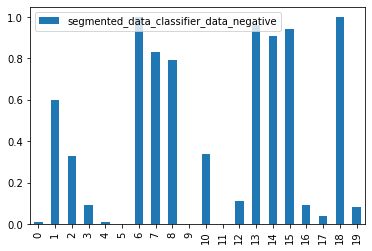

In [40]:
dataframe[['segmented_data_classifier_data_negative']].astype('float').plot.bar()